<a href="https://colab.research.google.com/github/adityanarayan794/TFpublic/blob/master/Tensorflow_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#load the dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
#explore data
print("Shape : {}".format(train_images.shape))
print("Number : {}".format(len(train_images)))
print("")
print("Labels : {}".format(train_labels))

Shape : (60000, 28, 28)
Number : 60000

Labels : [5 0 4 ... 5 6 8]


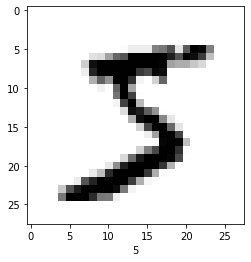

In [11]:
plt.figure()
plt.imshow(train_images[0],cmap = plt.cm.binary)
plt.xlabel("{}".format(train_labels[0]))
plt.show()

In [0]:
#Normalize the data

train_images = train_images / 255.0
test_images = test_images / 255.0

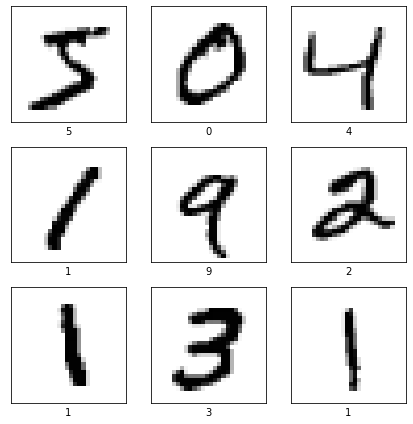

In [16]:
plt.figure(figsize=(6,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap= plt.cm.binary)
  plt.xlabel("{}".format(train_labels[i]))
plt.tight_layout()
plt.show()

In [0]:
#Model Structure

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10),
                          keras.layers.Softmax()
])

model.compile(optimizer = 'adam' , loss = keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])


In [19]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9230
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1183 - accuracy: 0.9652
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0809 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0609 - accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0465 - accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0366 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0284 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0228 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0191 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.016

In [22]:
test_loss , test_accuracy = model.evaluate(test_images,test_labels,verbose= 2)

313/313 - 0s - loss: 0.0837 - accuracy: 0.9765


In [0]:
prediction_model = model

In [0]:
predictions = prediction_model.predict(test_images)

In [0]:
def plot_image(i, predictions_array , true_labels ,img):
  predictions_array , true_labels ,img = predictions_array, true_labels[i],img[i]
  predicted_label = np.argmax(predictions_array)
  if predicted_label  == true_labels :
    color = 'blue'
  else:
    color = 'red'
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img , cmap =plt.cm.binary)
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label, 100*np.max(predictions_array),true_labels,color = color))


def plot_value_array(i, predictions_array , true_labels):
  predictions_array , true_labels = predictions_array , true_labels[i]
  plt.xticks(range(10))
  plt.yticks([])
  plt.grid(False)
  thisplot = plt.bar(range(10), predictions_array ,color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_labels].set_color('blue')


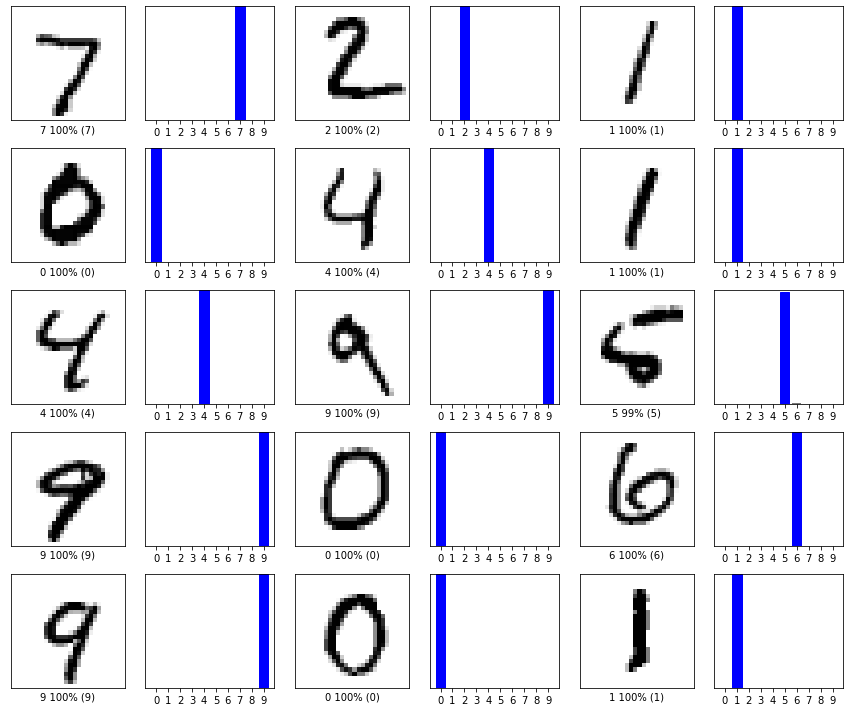

In [52]:
num_rows = 5
num_column = 3
plt.figure(figsize=(2*2*num_column, 2*num_rows))
for i in range(num_rows*num_column):
  plt.subplot(num_rows , 2* num_column , 2*i+1)
  plot_image(i, predictions[i], test_labels ,test_images)
  plt.subplot(num_rows ,2* num_column ,2*i+2)
  plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()